In [34]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib import ticker
import plotly.express as plx
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# Specify relative path to the file
file_path = "../database/CreditCard.csv"

# Load data into a pandas DataFrame
df = pd.read_csv(file_path)

In [35]:
data=df.copy()

In [36]:
data.columns.values

array(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract',
       'Paperless Billing', 'Payment Method', 'Monthly Charges',
       'Total Charges', 'Churn Label', 'Churn Value', 'Churn Score',
       'CLTV', 'Churn Reason'], dtype=object)

# Correlações

In [37]:
corr_data = data.copy()

In [38]:
corr_data['Churn Label'].replace(to_replace='Yes', value=1, inplace=True)
corr_data['Churn Label'].replace(to_replace='No',  value=0, inplace=True)

In [39]:
df_dummies = pd.get_dummies(corr_data[['Churn Label','Phone Service','Multiple Lines','Internet Service','Online Security',
                                 'Online Backup','Device Protection','Tech Support','Streaming TV',
                                 'Streaming Movies', 'Contract']])
df_dummies.head()

,Churn Label,Phone Service_No,Phone Service_Yes,Multiple Lines_No,Multiple Lines_No phone service,Multiple Lines_Yes,Internet Service_DSL,Internet Service_Fiber optic,Internet Service_No,Online Security_No,...,Tech Support_Yes,Streaming TV_No,Streaming TV_No internet service,Streaming TV_Yes,Streaming Movies_No,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year
0,1,0,1,1,0,0,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0
1,1,0,1,1,0,0,0,1,0,1,...,0,1,0,0,1,0,0,1,0,0
2,1,0,1,0,0,1,0,1,0,1,...,0,0,0,1,0,0,1,1,0,0
3,1,0,1,0,0,1,0,1,0,1,...,1,0,0,1,0,0,1,1,0,0
4,1,0,1,0,0,1,0,1,0,1,...,0,0,0,1,0,0,1,1,0,0


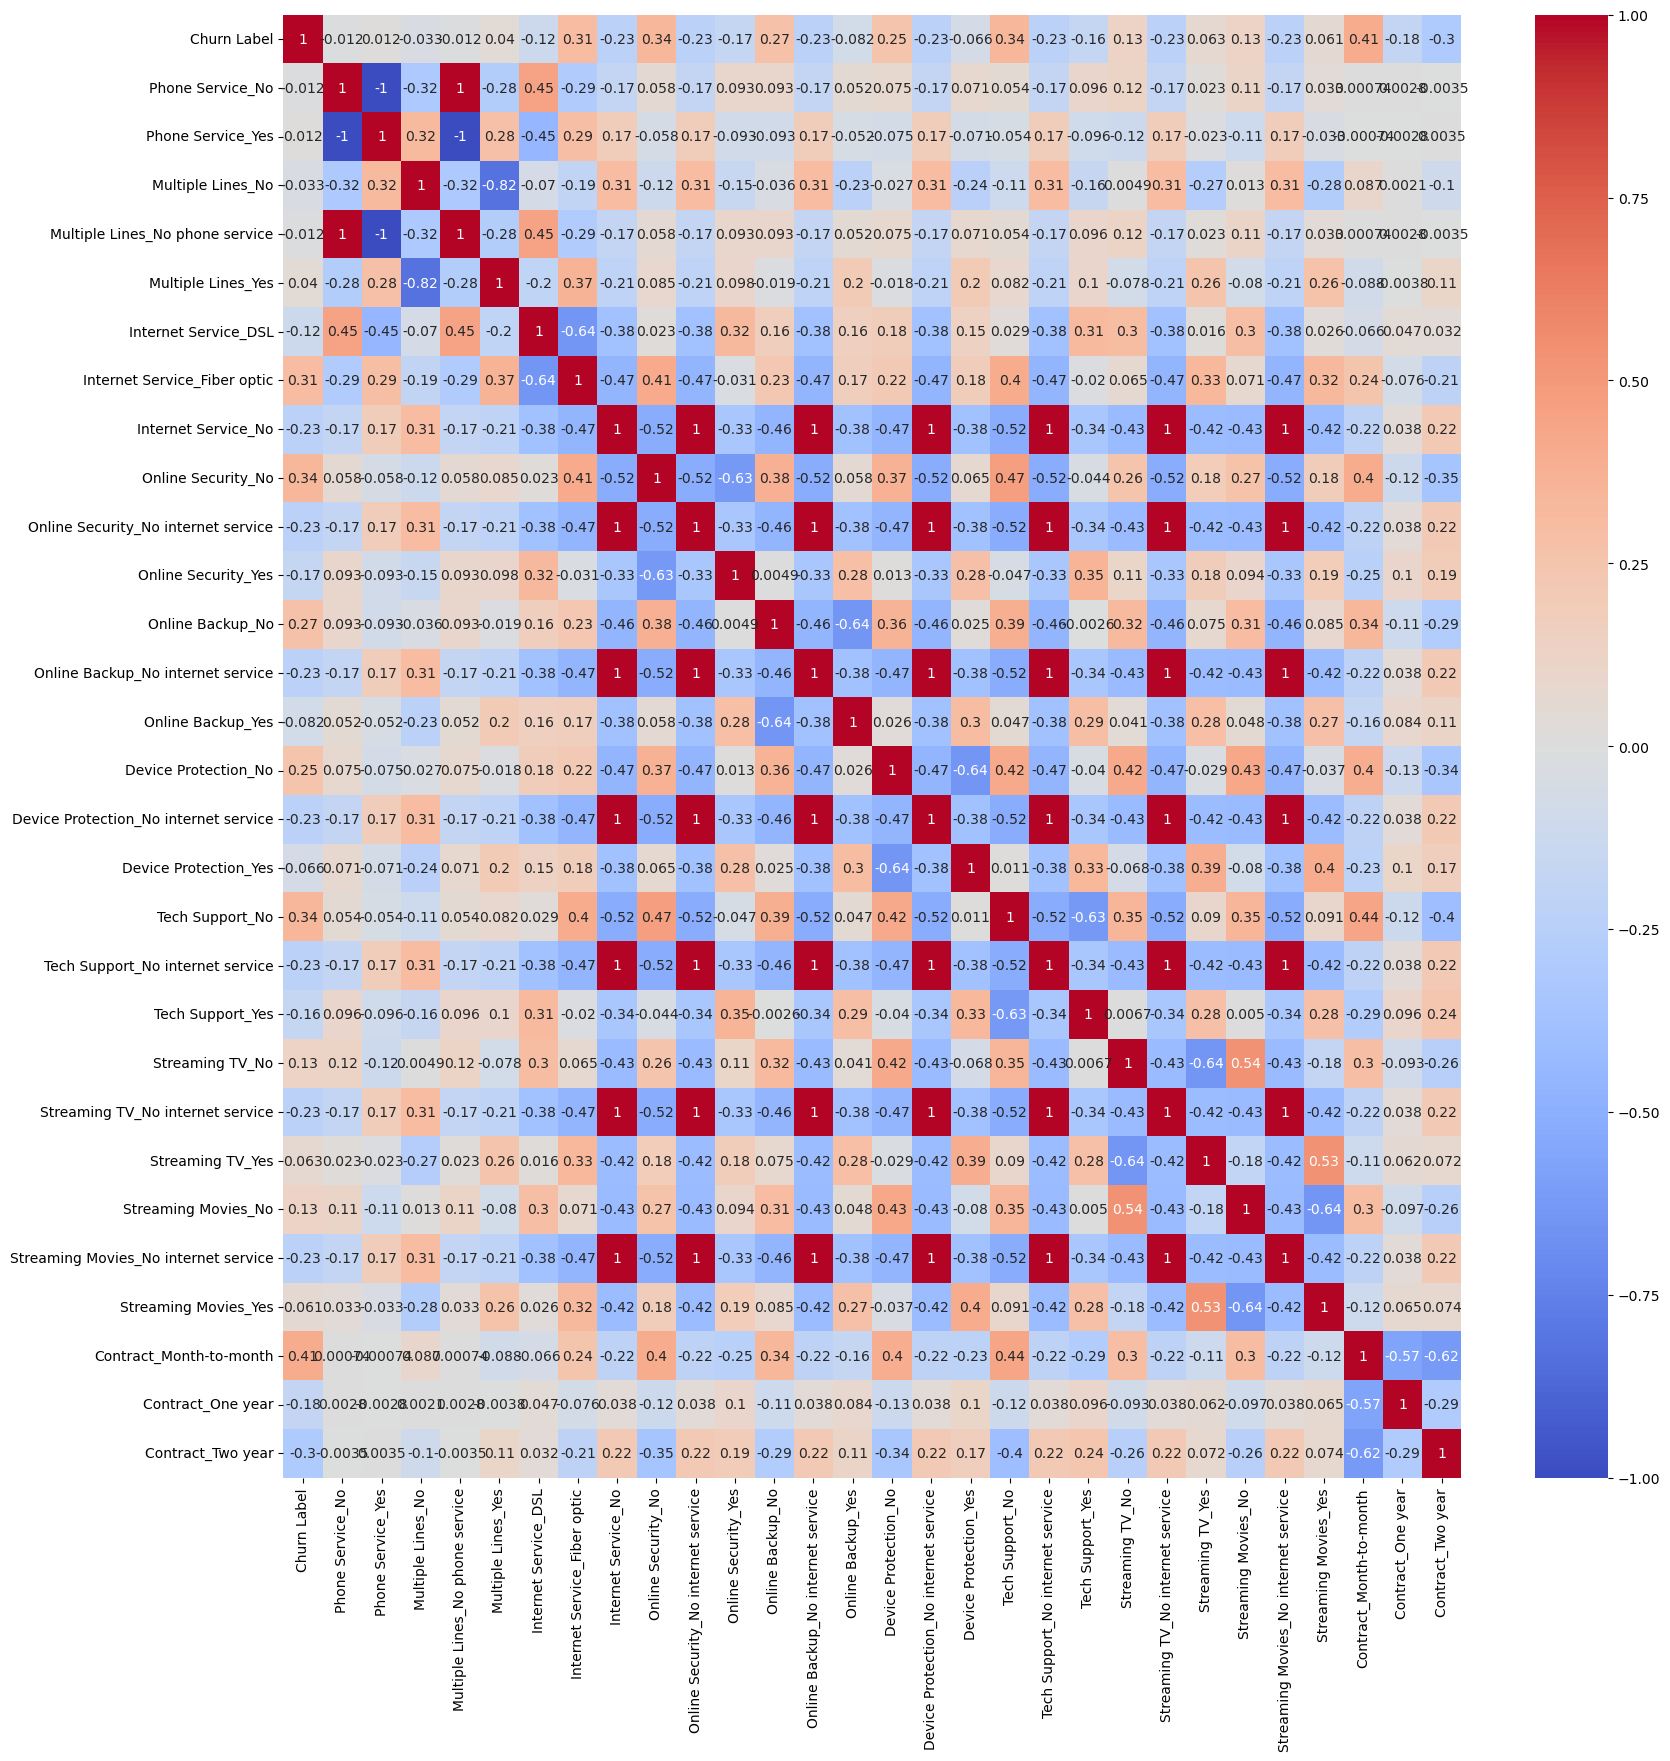

In [40]:
plt.figure(figsize=(19, 19))
sns.heatmap(df_dummies.corr(), annot=True, cmap='coolwarm')

plt.show()

Vamos analisar a correlação com Rotatividade (usando os rótulos e não valores):

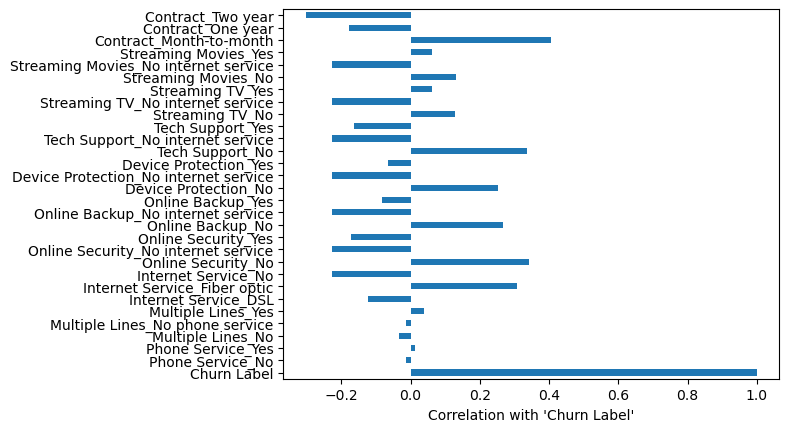

In [41]:
plt.figure()
ax = df_dummies.corr()['Churn Label'].plot(kind='barh')
ax.set_xlabel("Correlation with 'Churn Label'")
plt.show()

In [52]:
fig = plx.bar(df_dummies.corr()['Churn Label'].sort_values(ascending = False), 
             color = 'value')
fig.show()

Assim, podemos afirmar que:
* Internet Fibra Óptica tem correlação com churn value;
* Não Conectado a um Suporte Técnico, Segurança Online e Serviços de Backup Online tem uma correlação com o valor de rotatividade

Vamos observar por cidade:

/var/folders/95/__t12pzx6_3d58zfm36_nym80000gn/T/ipykernel_68474/2188535964.py:5: UserWarning:

FixedFormatter should only be used together with FixedLocator



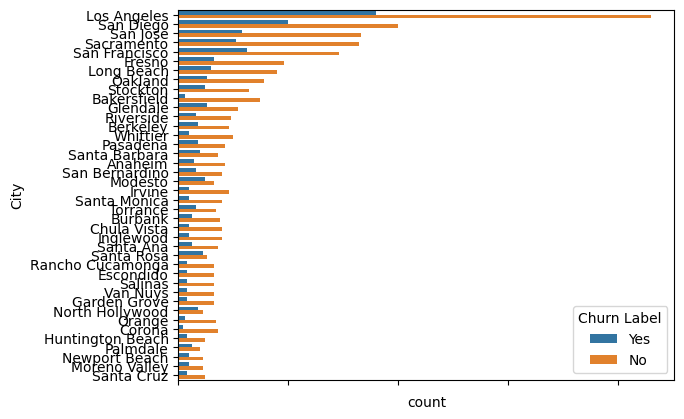

In [43]:
top_categories = data['City'].value_counts().head(40).index
df_filtered = data[data['City'].isin(top_categories)]

ax = sns.countplot(data=df_filtered, y='City', order=top_categories, hue='Churn Label')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

Ao observar por gênero, podemos observar que a rotatividade é independente do gênero:

/var/folders/95/__t12pzx6_3d58zfm36_nym80000gn/T/ipykernel_68474/3899719782.py:5: UserWarning:

FixedFormatter should only be used together with FixedLocator



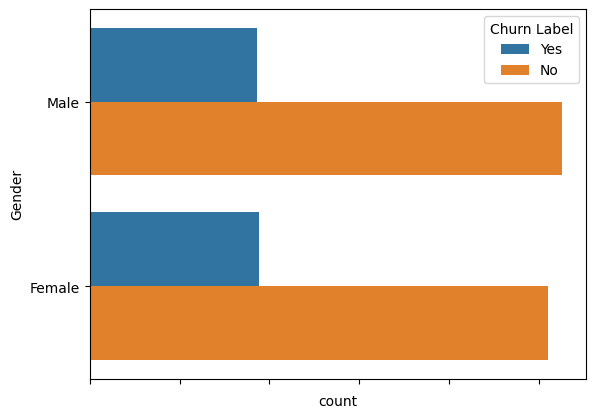

In [44]:
top_categories = data['Gender'].value_counts().index
df_filtered = data[data['Gender'].isin(top_categories)]

ax = sns.countplot(data=df_filtered, y='Gender', order=top_categories, hue='Churn Label')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

Vamos observar por tipo de contrato:

/var/folders/95/__t12pzx6_3d58zfm36_nym80000gn/T/ipykernel_68474/81210233.py:5: UserWarning:

FixedFormatter should only be used together with FixedLocator



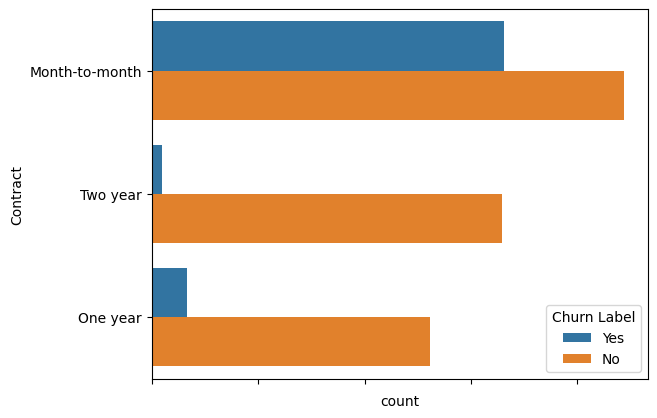

In [45]:
top_categories = data['Contract'].value_counts().index
df_filtered = data[data['Contract'].isin(top_categories)]

ax = sns.countplot(data=df_filtered, y='Contract', order=top_categories, hue='Churn Label')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

Há uma grande rotatividade em clientes com contrato mês a mês.

Vamos analisar alguns dos serviços prestados

#### Segurança Online

In [46]:
fig = plx.bar(data.groupby(['Internet Service','Online Security', 'Churn Label'])['CustomerID'].count().reset_index(),
             x="Internet Service",
             y="CustomerID", 
             color="Churn Label", 
             #barmode="group",
             text = 'CustomerID',
             facet_col = 'Online Security'
            )
fig.show()

#### Suporte Técnico

In [47]:
fig = plx.bar(data.groupby(['Internet Service', 'Tech Support', 'Churn Label'])['CustomerID'].count().reset_index(),
             x="Internet Service",
             y="CustomerID", 
             color="Churn Label", 
             text = 'CustomerID',
             barmode="group",
             facet_col="Tech Support"
            )
fig.show()

/var/folders/95/__t12pzx6_3d58zfm36_nym80000gn/T/ipykernel_68474/267683313.py:5: UserWarning:

FixedFormatter should only be used together with FixedLocator



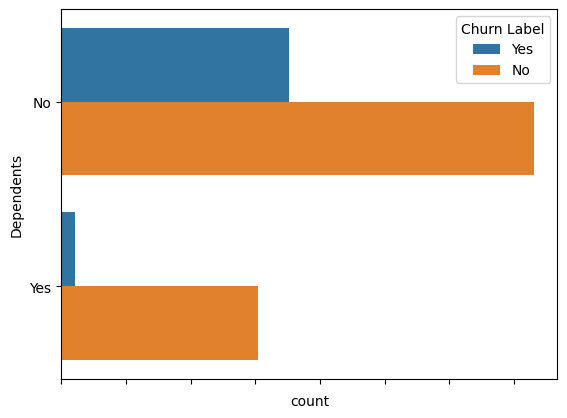

In [48]:
top_categories = df['Dependents'].value_counts().index
df_filtered = df[df['Dependents'].isin(top_categories)]

ax = sns.countplot(data=df_filtered, y='Dependents', order=top_categories, hue='Churn Label')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()


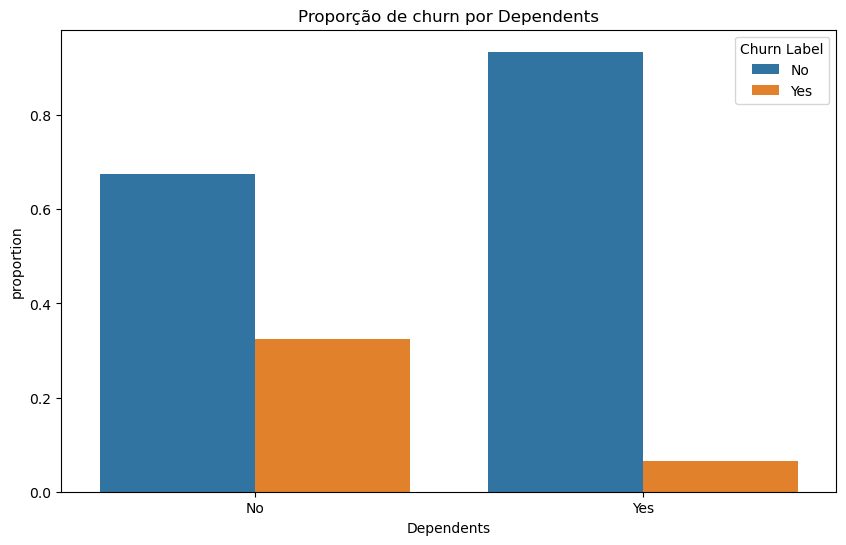

In [49]:
# Primeiro, vamos criar um DataFrame agrupado para obter as contagens
grouped = df.groupby(['Dependents', 'Churn Label']).size().reset_index(name='counts')

# Em seguida, calcule a soma total para cada categoria de 'Dependents'
group_sum = grouped.groupby(['Dependents'])['counts'].sum().reset_index(name='category_sum')

# Faça um merge dos DataFrames para ter a soma total disponível
grouped = grouped.merge(group_sum, on='Dependents')

# Agora calcule a proporção
grouped['proportion'] = grouped['counts'] / grouped['category_sum']

# Agora vamos plotar
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped, x='Dependents', y='proportion', hue='Churn Label', ci=None)
plt.title('Proporção de churn por Dependents')
plt.show()


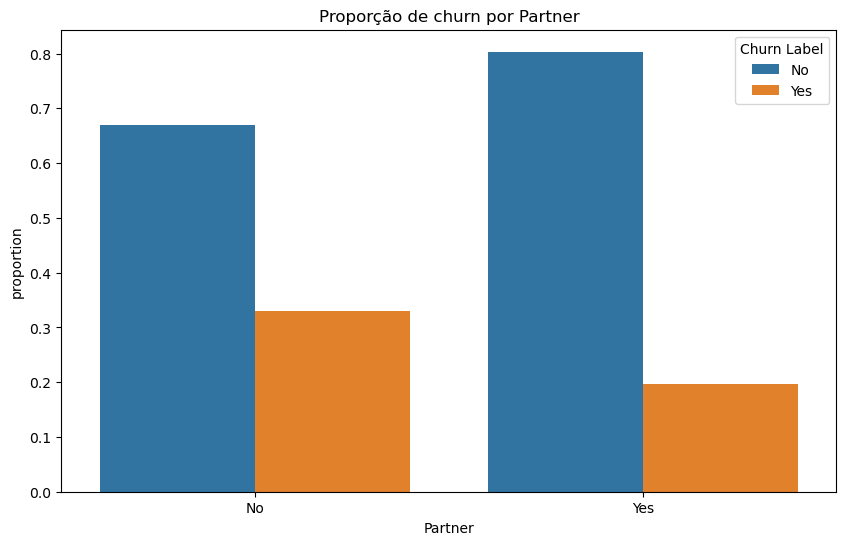

In [50]:
# Primeiro, vamos criar um DataFrame agrupado para obter as contagens
grouped = df.groupby(['Partner', 'Churn Label']).size().reset_index(name='counts')

# Em seguida, calcule a soma total para cada categoria de 'Partner'
group_sum = grouped.groupby(['Partner'])['counts'].sum().reset_index(name='category_sum')

# Faça um merge dos DataFrames para ter a soma total disponível
grouped = grouped.merge(group_sum, on='Partner')

# Agora calcule a proporção
grouped['proportion'] = grouped['counts'] / grouped['category_sum']

# Agora vamos plotar
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped, x='Partner', y='proportion', hue='Churn Label', ci=None)
plt.title('Proporção de churn por Partner')
plt.show()


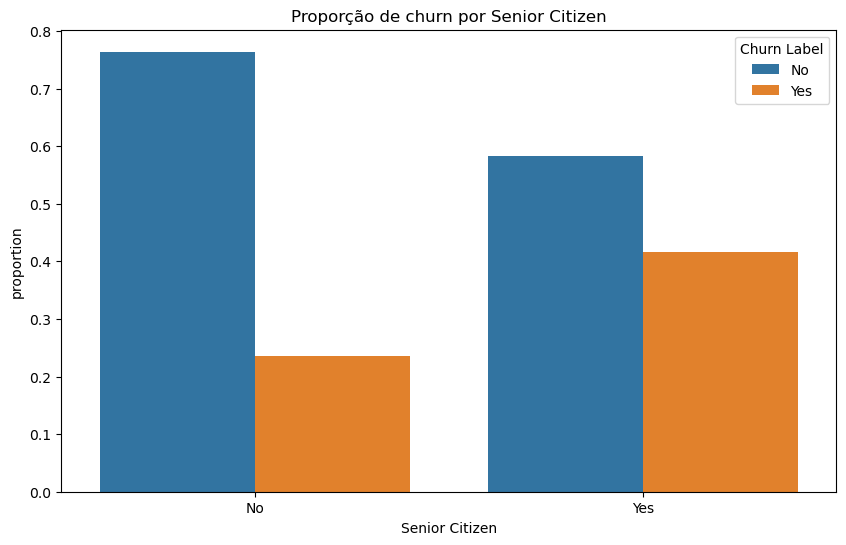

In [51]:
# Primeiro, vamos criar um DataFrame agrupado para obter as contagens
grouped = df.groupby(['Senior Citizen', 'Churn Label']).size().reset_index(name='counts')

# Em seguida, calcule a soma total para cada categoria de 'Senior Citizen'
group_sum = grouped.groupby(['Senior Citizen'])['counts'].sum().reset_index(name='category_sum')

# Faça um merge dos DataFrames para ter a soma total disponível
grouped = grouped.merge(group_sum, on='Senior Citizen')

# Agora calcule a proporção
grouped['proportion'] = grouped['counts'] / grouped['category_sum']

# Agora vamos plotar
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped, x='Senior Citizen', y='proportion', hue='Churn Label', ci=None)
plt.title('Proporção de churn por Senior Citizen')
plt.show()
